In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

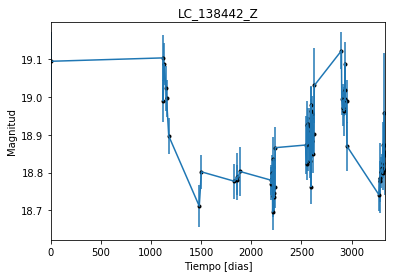

In [2]:
data = np.genfromtxt('LC_138442_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_138442_Z')
plt.savefig("LC_138442_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

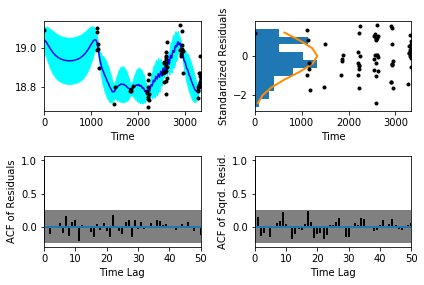

In [5]:
sample.assess_fit()

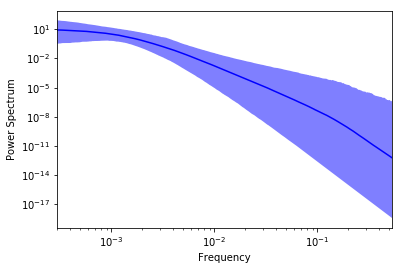

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

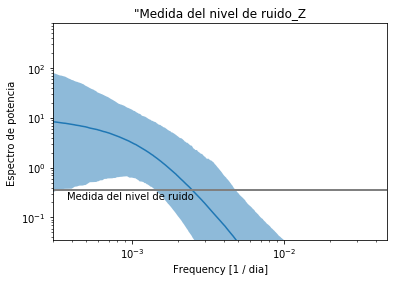

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_138442_Z')
plt.title('"Medida del nivel de ruido_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_138442_Z')

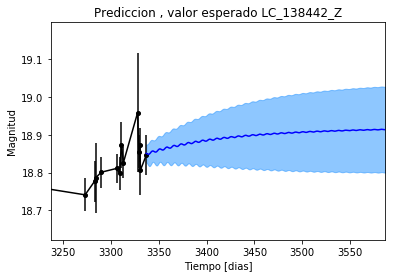

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_138442_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_138442_Z')

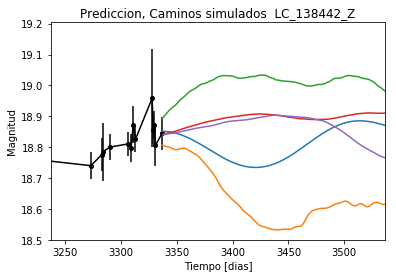

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_138442_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


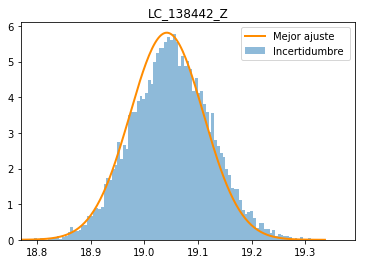

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_138442_Z')
plt.savefig("Mejor_ajuste_LC_138442_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_138442_Z')

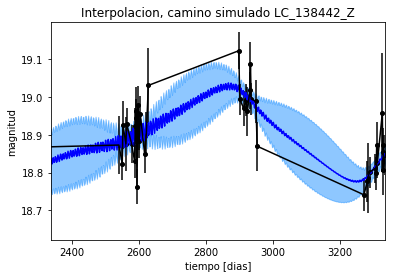

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_138442_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_138442_Z')

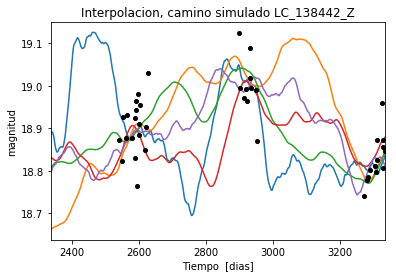

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_138442_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 499.139715395
Median: 0.00662221251792
Standard deviation: 0.196356743396
68% credibility interval: [ 0.00069085  0.185056  ]
95% credibility interval: [  3.40244425e-04   7.84808043e-01]
99% credibility interval: [  3.09523722e-04   9.93414234e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 885.142179702
Median: 0.00155123745394
Standard deviation: 0.079939498243
68% credibility interval: [ 0.00047783  0.02033759]
95% credibility interval: [ 0.00032599  0.26678929]
99% credibility interval: [  3.04485341e-04   5.58146827e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 772.84714695
Median: 0.00863007950569
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1463.16232876
Median: 113.125077775
Standard deviation: 1.56125200039
68% credibility interval: [ 111.37217479  114.26355021]
95% credibility interval: [ 108.96628614  114.9990937 ]
99% credibility interval: [ 107.00051147  115.44866384]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 593.940380156
Median: 0.544277380788
Standard deviation: 2.12035792523
68% credibility interval: [ 0.04275538  3.72623452]
95% credibility interval: [ 0.01309557  6.97785737]
99% credibility interval: [  9.54212460e-03   9.70726519e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1284.89598118
Median: 0.281835212827
Standard deviation: 8.87673742758
68% credibility interval: [ 0.00832175  7.35416579]
95% credibility interval: [  5.1

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1424.65571864
Median: 7.1574083909e-20
Standard deviation: 4.61614874533e+58
68% credibility interval: [  4.14004369e-60   2.85963625e-02]
95% credibility interval: [  2.88929431e-138   1.99388590e+028]
99% credibility interval: [  1.33933638e-143   6.46282262e+040]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1790.99925843
Median: 18.8944562406
Standard deviation: 0.0823573339669
68% credibility interval: [ 18.8405979  18.9719622]
95% credibility interval: [ 18.76748364  19.09600181]
99% credibility interval: [ 18.69453833  19.23232015]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 445.40391935
Median: 0.00250573063935
Standard deviation: 0.244994453643
68% credibility interval: [ 0.          0.34165547]
95% credibility interval: [ 0.          0.86432566]
99% credibility interval: [ 0.          1.02574552]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 445.40391935
Median: 0.00250573063935
Standard deviation: 0.244994453643
68% credibility interval: [ 0.          0.34165547]
95% credibility interval: [ 0.          0.86432566]
99% credibility interval: [ 0.          1.02574552]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 650.662943944
Median: 0.0
Standard deviation: 0.000699091903409
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1463.16232876
Median: 113.125077775
Standard deviation: 1.56125200039
68% credibility interval: [ 111.37217479  114.26355021]
95% credibility interval: [ 108.96628614  114.9990937 ]
99% credibility interval: [ 107.00051147  115.44866384]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2059.34621185
Median: 0.0206438215298
Standard deviation: 0.0347434139818
68% credibility interval: [ 0.01073019  0.0451695 ]
95% credibility interval: [ 0.00632466  0.11786718]
99% credibility interval: [ 0.00452745  0.22466769]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2592.15490081
Median: 0.999153339075
Standard deviation: 0.149422760741
68% credibility interval: [ 0.8730397   1.16233815]
95% credibility interval: [ 0.76280139  1.34406196]
99% credibility interval: [ 0.71479598  1.49098522]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1819.46036903
Median: 5.15451849642e-05
Standard deviation: 0.0666649343197
68% credibility interval: [  3.94679234e-07   1.92990684e-03]
95% credibility interval: [  1.01398566e-33   2.66708557e-02]
99% credibility interval: [  4.25824817e-46   2.10273635e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 499.139715395
Median: (-0.0416085883936-0.219985849603j)
Standard deviation: 1.97274261838
68% credibility interval: [-1.16274117-0.9378259j  -0.00434076-0.38771503j]
95% credibility interval: [ -4.93109436e+00+0.j         -2.13781877e-03-0.0993245j]
99% credibility interval: [ -6.24180572e+00+0.j          -1.94479490e-03-0.01152135j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 885.142179702
Median: (-0.00974671237854+0.0166875031564j)
Standard deviation: 1.61921727444
68% credibility interval: [-0.12778483+2.49217993j -0.00300231+0.j        ]
95% credibility interval: [-1.67628657 +4.84065242e+00j -0.00204823 +1.57643871e-03j]
99% credibility interval: [ -3.50693994e+00+3.58911639j  -1.91313782e-03+0.j        ]
Po